<a href="https://colab.research.google.com/github/Jhonnety/big_data/blob/main/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller 2 - Jhon Esteban Velasquez Gomez

In [ ]:
import numpy as np
#listas, diccionarios, directores, arreglos
import pandas as pd
#pandas manejo de data frame
import matplotlib.pyplot as plt
import seaborn as sns
#seaborn librearia para realizar graficos a partir de data frames

In [ ]:
df = pd.read_csv("./hotel_bookings.csv")

<ipython-input-4-2af78ab2a0af>:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./hotel_bookings.csv")


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           21799 non-null  object 
 1   is_canceled                     21799 non-null  int64  
 2   lead_time                       21799 non-null  int64  
 3   arrival_date_year               21799 non-null  int64  
 4   arrival_date_month              21799 non-null  object 
 5   arrival_date_week_number        21799 non-null  int64  
 6   arrival_date_day_of_month       21799 non-null  int64  
 7   stays_in_weekend_nights         21799 non-null  int64  
 8   stays_in_week_nights            21799 non-null  int64  
 9   adults                          21799 non-null  int64  
 10  children                        21799 non-null  int64  
 11  babies                          21799 non-null  int64  
 12  meal                            

In [ ]:
df['hotel'] = df['hotel'].astype("category")
df['is_canceled'] = df['is_canceled'].astype("category")
df['reservation_status'] = df['reservation_status'].astype("category")
df['reservation_status_date'] = df['reservation_status_date'].astype("category")

df['customer_type'] = df['customer_type'].astype("category")
df['assigned_room_type'] = df['assigned_room_type'].astype("category")
df['reserved_room_type'] = df['reserved_room_type'].astype("category")

df['distribution_channel'] = df['distribution_channel'].astype("category")
df['market_segment'] = df['market_segment'].astype("category")
df['country'] = df['country'].astype("category")
df['meal'] = df['meal'].astype("category")
df['arrival_date_month'] = df['arrival_date_month'].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           21799 non-null  category
 1   is_canceled                     21799 non-null  category
 2   lead_time                       21799 non-null  int64   
 3   arrival_date_year               21799 non-null  int64   
 4   arrival_date_month              21799 non-null  category
 5   arrival_date_week_number        21799 non-null  int64   
 6   arrival_date_day_of_month       21799 non-null  int64   
 7   stays_in_weekend_nights         21799 non-null  int64   
 8   stays_in_week_nights            21799 non-null  int64   
 9   adults                          21799 non-null  int64   
 10  children                        21799 non-null  int64   
 11  babies                          21799 non-null  int64   
 12  meal              

1. ¿Cuál es la cantidad de reservas canceladas y no canceladas?

In [ ]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [ ]:
df['is_canceled'].value_counts()

1    11085
0    10714
Name: is_canceled, dtype: int64

In [ ]:
df['reservation_status' == ''].value_counts()

Canceled     10804
Check-Out    10713
No-Show        281
Name: reservation_status, dtype: int64

<Axes: xlabel='reservation_status', ylabel='count'>

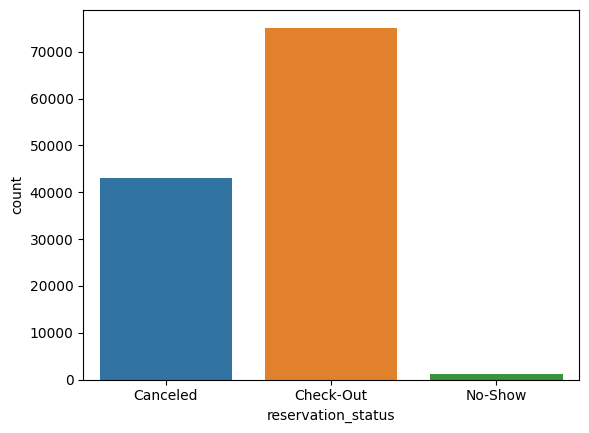

In [ ]:
sns.countplot(x=df["reservation_status"])

**Respuesta (1) = La cantidad de reservas canceladas son 43017. Hay para revisar 75166 y no mostrado 1207, habiendo un total de 76373 reservas no canceladas.**

3. ¿Cuál es el promedio de lead_time para reservas no canceladas?


In [ ]:
dfNC = df[df['reservation_status'] != 'Canceled']

In [ ]:
dfNC['reservation_status'].value_counts()

Check-Out    75166
No-Show       1207
Canceled         0
Name: reservation_status, dtype: int64

In [ ]:
dfNC['lead_time'].describe()

count    76373.000000
mean        79.624317
std         90.818543
min          0.000000
25%          8.000000
50%         45.000000
75%        124.000000
max        737.000000
Name: lead_time, dtype: float64

In [ ]:
dfNC['lead_time'].mean()

79.62431749440248

**Respuesta (3) = El promedio de lead_time para reservas no canceladas es de 79.62431749440248**

5. ¿Cuál es la cantidad de reservas (independientemente si son canceladas o no ) por market_segment?

In [ ]:
pv=pd.pivot_table(df,index='reservation_status', values="hotel",columns="market_segment",aggfunc=['count'])
pv

count                                            \
market_segment     Aviation Complementary Corporate   Direct   Groups   
reservation_status                                                      
Canceled               41.0          85.0     916.0   1722.0  12023.0   
Check-Out             185.0         646.0    4303.0  10672.0   7714.0   
No-Show                11.0          12.0      76.0    212.0     74.0   

                                                      
market_segment     Offline TA/TO Online TA Undefined  
reservation_status                                    
Canceled                  8080.0   20148.0       2.0  
Check-Out                15908.0   35738.0       NaN  
No-Show                    231.0     591.0       NaN

**Respuesta (5) = La grafica de arriba muestra el numero de reservas canceladas y no canceladas (check-out y no-show) por cada market_segment**




7. Realice un boxplot de la variable adr e interprételo.

<Axes: ylabel='adr'>

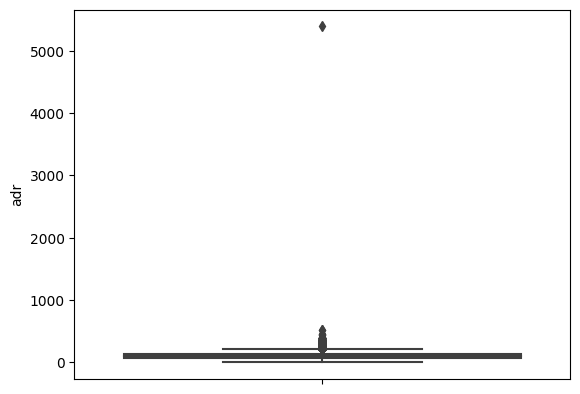

In [ ]:
sns.boxplot(data=df, y= df['adr'])

In [ ]:
df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Respuesta (7) = La mayoria de los costos de reservas "adr" se centran o estan entre 69 y 126. Hay datos bastante atipicos como por ejemplo el 5400, haciendo que la grafica se aplaste bastante ya que es sencible a valores extremos.


Si bien se presentan inconsistencias como valores negativos en el costo de reserva, donde el minimo costo de una reserva deberia de ser 0.  Son realmente pocos los datos los datos que presentan este comportamiento, ademas estando cerca de los valores centrales en comparacion de por ejemplo el 5400. Por lo cual se podrian ignorar en el boxplot o eliminar simplemente

9. ¿Cuál es el promedio days_in_waiting_list por país?

In [ ]:
pv=pd.pivot_table(df,index='country', values='days_in_waiting_list',aggfunc=['mean'])
pv

,mean
,days_in_waiting_list
country,
ABW,0.0
AGO,0.0
AIA,0.0
ALB,0.0
AND,0.0
...,...
VGB,0.0
VNM,0.0


**Respuesta (9) = La tabla de arriba presenta el promedio de days_in_waiting_list por cada pais**

11. Realice una gráfica que muestre el tipo de alimentación meal respecto a la cantidad de adultos.

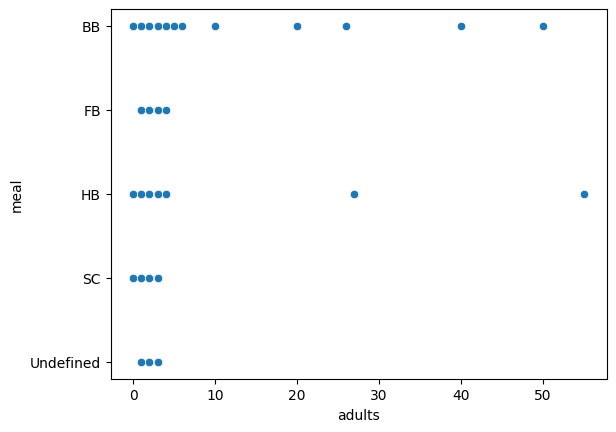

In [ ]:

sns.scatterplot(data=df,x='adults',y='meal');

Respuesta (11) = La grafica de arriba muestra el tipo de alimentacion respecto a la cantidad de adultos.

13. ¿Hay alguna relación entre el adr y el tipo de market_segment?

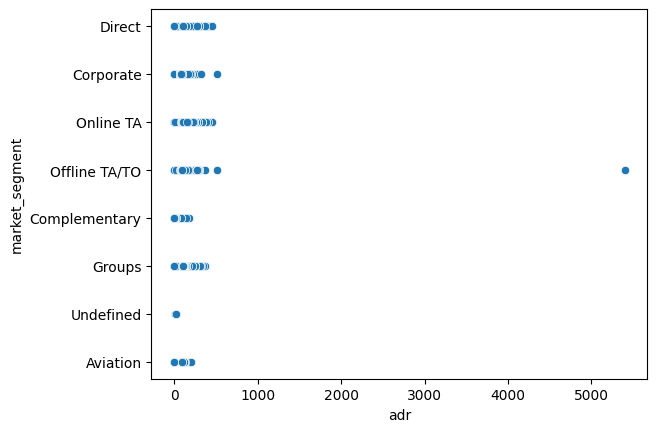

In [ ]:
sns.scatterplot(data=df,x='adr',y='market_segment');

Respuesta (13) = La grafica nos muestra que no hay una relacion considerable entre el adr y el tipo de market_segment, ya que independientemente del tipo de market_segment, el costo de reserva "adr" no varia mucho.

15. Realice un histograma del lead time e interprételo.



<Axes: xlabel='lead_time', ylabel='Count'>

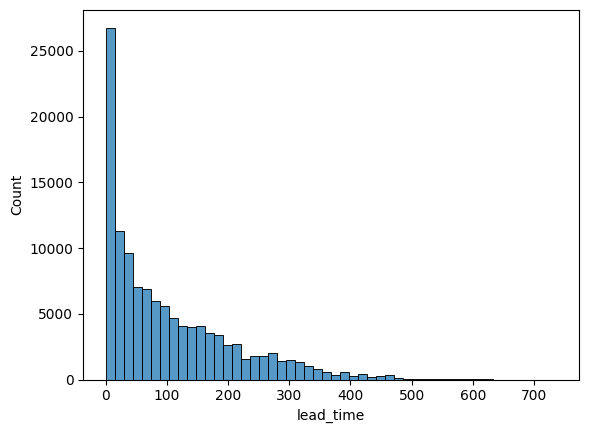

In [ ]:
sns.histplot(data=df, x= df['lead_time'], bins=50)


Respuesta (15) = El tiempo de espera "lead_time" mas normal esta entre 0 y 10 unidadesaproximadamente. En general el tiempo de espera esta comprendido entre 0 y 200 unidades.
La grafica nos muestra que los datos estan asimetricos hacia la derecha, ya que hay  valores o casos muy poco comunes haciendo que la grafica a medida que crece esta se vaya aplanando